# <span style="color:blue">Scraping data from Coolblue</span>

For the course Online Data Collection & Management at Tilburg University, our team aims to scrape data from the Coolblue website. Coolblue is a Dutch ecommerce company. However, Coolblue claims they are more than just an ecommerce company, she builds end-to-end solutions for her customers. They are active in the Netherlands, Belgium, and Germany, both online and in her 15 physical stores. 

In this scraper we scrape Coolblue's Choice. This indicates the best products for Coolblue's consumers, according to other consumers and experts. The products in this category are hardly ever returned, and have the best reviews. A list of these products can be found [here](https://www.coolblue.nl/en/coolblues-keuze). The names, prices, and "reviews" (number of stars) of these products are scraped. 

Coolblue's Choice (or in Dutch, Coolblue's Keuze) is unique and very customer-oriented. It makes the choice to buy a certain product easier and more accessible. For example, your washing machine broke down and you immediately need a new one. You do not have the time to check out all the reviews. Go to Coolblue's website and you can easily find a few washing machines with a Coolblue's Choice logo on it. 

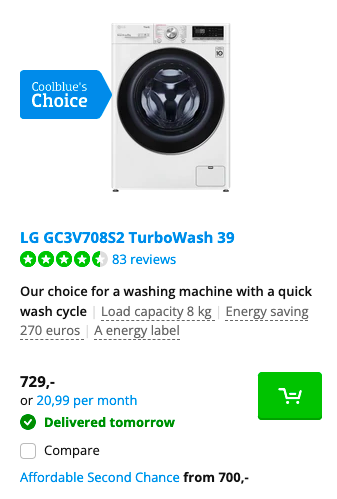

In this notebook we will discuss the scraping in three chapters:
1. The preparation before scraping
2. The Coolblue.nl/en/coolblues-keuze scraper
3. Saving the scraped data in a csv file

# <span style="color:blue">1. The preparation before scraping</span>
Before the Coolblue website can be scraped, a few things need to be prepared:
* Import necessary libraries.
* Seed generation as a starting point for the data to collect.
* Generate all page url's.

## 1.1 Import necessary libraries

In [1]:
import requests # Lets us make HTML request to Coolblue's website server for retrieving the data from their page.
from bs4 import BeautifulSoup # Easy to use for beginners and will allow us to extract data from HTML files.
import time # Pauses the execution of the commands. We use this because of the amount of data we gather.
from time import sleep # Sleep package is needed to obey retrieval limits.
import csv # Stores the scraped data in a csv file in the end.
from datetime import datetime # Adds current day to csv file.
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from re import search
from selenium.webdriver import ActionChains

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/irisvanwalraven/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache


## 1.2 Seed generation
In this part a 'seed' will be generated to scrape the data. The seed is in this case the product names of the Coolblue's Choice products and their urls.

First the base url is defined. This url is the same for all Coolblue's Choice products. 

In [3]:
# Defining the base url
base_url = 'https://www.coolblue.nl/en'

In [4]:
driver.get(base_url)
print("done!")

done!


### 1.2.1 Automatically accept cookies

In [5]:
# To automatically accept cookies
driver.find_element_by_name("accept_cookie").click()

## 1.3 Laptops

### 1.3.1 products coolblues choice

In [6]:
def generate_coolblues_choice_urls(base_url, num_pages):
    coolblues_choice_urls = []
    
    for counter in range(1,num_pages +1):
        coolblues_choice_url = base_url + '/laptops/coolblues-choice?page=' + str(counter)
        coolblues_choice_urls.append(coolblues_choice_url)
    return coolblues_choice_urls

In [7]:
links_cc = generate_coolblues_choice_urls(base_url, 2)
print(links_cc)

['https://www.coolblue.nl/en/laptops/coolblues-choice?page=1', 'https://www.coolblue.nl/en/laptops/coolblues-choice?page=2']


cc = coolblues choice

In [57]:
def generate_product_urls_cc(links_cc):
    products_list_cc = []
    
    for link_cc in links_cc:
        driver.get(link_cc)
        time.sleep(5)
        res_cc = driver.page_source.encode('utf-8')
        soup_cc = BeautifulSoup(res_cc, "html.parser")
        products_cc = soup_cc.find_all("div", class_ = "col--12 col--6@md")
        
        for product_cc in products_cc:
                product_list_cc = product_cc.find("a").attrs["href"]
                print(product_list_cc)
                products_list_cc.append(product_list_cc)
                
    return(products_list_cc)

In [58]:
products_list_cc = generate_product_urls_cc(links_cc)

/en/product/872868/lenovo-thinkbook-15-g2-20ve0049mh.html
/en/product/874171/apple-macbook-air-2020-16gb-256gb-apple-m1-with-7-core-gpu-space-gray.html
/en/product/889428/hp-pavilion-15-eh1907nd.html
/en/product/873236/hp-15s-fq2960nd.html
/en/product/868651/hp-chromebook-14a-na0170nd.html
/en/product/900571/lenovo-ideapad-5-14are05-81ym00f7mh.html
/en/product/872308/hp-probook-450-g8-2e9f9ea.html
/en/product/872864/lenovo-thinkbook-15-g2-20ve0046mh.html
/en/product/874177/apple-macbook-pro-13-inches-2020-16gb-256gb-apple-m1-space-gray.html
/en/product/874178/apple-macbook-pro-13-inches-2020-16gb-512gb-apple-m1-space-gray.html
/en/product/878296/lenovo-ideapad-5-pro-14acn6-82l7006vmh.html
/en/product/879388/acer-swift-3-sf316-51-51bs.html
/en/product/886177/asus-chromebook-c523na-ej0446.html
/en/product/882865/lenovo-legion-5-17imh05-82b300cbmh.html
/en/product/839397/acer-chromebook-314-cb314-1ht-c6xm.html
/en/product/876297/acer-chromebook-spin-514-cp514-1hh-r7pk.html
/en/product/894

In [53]:
print("The number of laptops in Coolblues choice is " +str(len(products_list_cc)))

The number of laptops in Coolblues choice is 43


### 1.3.2 all products

In [23]:
def generate_all_laptops_urls(base_url, num_pages):
    all_laptops_urls = []
    
    for counter in range(1,num_pages +1):
        all_laptops_url = base_url + '/laptops/filter?page=' + str(counter)
        all_laptops_urls.append(all_laptops_url)
    return all_laptops_urls

In [36]:
links_al = generate_all_laptops_urls(base_url, 1)
print(links_al)

['https://www.coolblue.nl/en/laptops/filter?page=1']


### al = all laptops

In [42]:
def generate_product_urls_al(links_al):
    products_list_al = []
    
    for link_al in links_al:
        driver.get(link_al)
        time.sleep(5)
        res_al = driver.page_source.encode('utf-8')
        soup_al = BeautifulSoup(res_al, "html.parser")
        products_al = soup_al.find_all("div", class_ = "h3 mt--4@sm")
        
        for product_al in products_al:
                product_list_al = product_al.find("a").attrs["href"]
                print(product_list_al)
                products_list_al.append(product_list_al)
                
    return(products_list_al)

In [43]:
products_list_al = generate_product_urls_al(links_al)

/en/product/872868/lenovo-thinkbook-15-g2-20ve0049mh.html
/en/product/872308/hp-probook-450-g8-2e9f9ea.html
/en/product/894399/apple-macbook-pro-14-inches-2021-m1-pro-8-core-cpu-14-core-gpu-32gb-1tb-space-gray.html
/en/product/894402/apple-macbook-pro-14-inches-2021-m1-pro-10-core-cpu-16-core-gpu-32gb-512gb-space-gray.html
/en/product/874171/apple-macbook-air-2020-16gb-256gb-apple-m1-with-7-core-gpu-space-gray.html
/en/product/874177/apple-macbook-pro-13-inches-2020-16gb-256gb-apple-m1-space-gray.html
/en/product/889429/hp-pavilion-15-eh1908nd.html
/en/product/894397/apple-macbook-pro-14-inches-2021-m1-pro-8-core-cpu-14-core-gpu-16gb-1tb-space-gray.html
/en/product/872864/lenovo-thinkbook-15-g2-20ve0046mh.html
/en/product/889428/hp-pavilion-15-eh1907nd.html
/en/product/894444/apple-macbook-pro-16-inches-2021-m1-pro-10-core-cpu-16-core-gpu-32gb-1tb-space-gray.html
/en/product/900571/lenovo-ideapad-5-14are05-81ym00f7mh.html
/en/product/894403/apple-macbook-pro-14-inches-2021-m1-pro-10-co

In [51]:
print("The number of all laptops is " +str(len(products_list_al)))

The number of all laptops is 22


# <span style="color:blue">2. The Coolblue scraper</span>
In this part the Coolblue scraper is introduced. The function will have the input of the page urls which we were able to generate above. With the use of a loop we are able to scrape the product name, price, and number of stars (reviews). First, we are going to make a function to extract the product name based on the product urls.

In [ ]:
# collect review data from coolblues choice
def extract_laptop_info_cc(products_list_cc):
    info_list_cc = []
    
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);') # to scroll down to reviews
driver.find_element_by_name("call-to-action__content").click()

In [ ]:
def extract_book_urls(page_urls):
    '''collect the book title and url for every book on all page urls'''
    book_list = []
    
    # collect all books on page_url
    for page_url in page_urls: 
        res = requests.get(page_url)
        soup = BeautifulSoup(res.text, "html.parser")
        books = soup.find_all(class_="product_pod")
        
        # for each book on that page look up the title and url and store it in a list
        for book in books: 
            book_title = book.find("img").attrs["alt"] 
            book_url = "https://books.toscrape.com/catalogue/" + book.find("a").attrs["href"].replace('../','')
            book_list.append({"title": book_title,
                             "url": book_url}) 
            
        sleep(1)  # pause 1 second after each request
            
    return book_list

base_url = "https://books.toscrape.com/catalogue/category/books_1/"
page_urls = generate_page_urls(base_url, 2) # to save time and resources we only scrape the first 2 pages
book_list = extract_book_urls(page_urls)

book_list[0:5]

In [ ]:
for product in products: 
    product_title = book.find("img").attrs["alt"] 
    product_url = book.find("a").attrs["href"]
    product_list.append({'title': book_title,
                      'url': book_url})

# <span style="color:blue">Writing CSV file</span>

In [ ]:
import csv 

with open("book_descriptions.csv", "w", encoding = 'utf-8') as csv_file: # <<- this is the line with the "flag"l see exercises below
    writer = csv.writer(csv_file, delimiter = ";")
    writer.writerow(["title", "description", "date_time"])
    now = datetime.now()
    for book in book_descriptions: # here we reference the book_descriptions list - make sure it's loaded otherwise you get an error! (Cell > Run All Above)
        writer.writerow([book['title'], book['description'], now])
print('done!')